In [ ]:
# dataset- https://drive.google.com/file/d/1XvS2y7eA-yPn8aVbfobCQAlMNB06J_wQ/view?usp=drive_link

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# data import
data = pd.read_csv('E-com_Data.csv')

# data dimension
data.shape

(541116, 12)

In [5]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [6]:
! pip install ydata-profiling 

In [57]:
# Importing the library
from ydata_profiling import ProfileReport

# creating the report
profile = ProfileReport(data, title="Profiling Report") 
profile.to_file(output_file = 'eda_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## RFM Analaysis

In [10]:
 # Recency: How recently a customer has made a purchase
#Frequency: How often a customer makes a purchase
#Monetary value: How much money a customer spends on purchases

In [11]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [12]:
# Columns used for RFM Analysis grouped by CustomerId
    # 1. Recency - Date of purchase
    # 2. Frequency - InvoiceNo
    # 3. Monetary - Price

In [13]:
# retaining the columns needed for Analysis
data = data[['CustomerID', 'InvoieNo', 'Date of purchase', 'Price']]

# renaming the columns
data = data.rename(columns={'InvoieNo': 'InvoiceNo', 'Date of purchase': 'Date'})

# data sample after filterning and renaming
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [14]:
# missing value percentage
round(data.isnull().mean()*100,2)


CustomerID    25.30
InvoiceNo      0.58
Date           0.58
Price          0.58
dtype: float64

In [15]:
# drop the missing value
data = data.dropna(subset=['CustomerID'])

# missing value percentage after treatment
round(data.isnull().mean()*100, 2)

CustomerID    0.0
InvoiceNo     0.0
Date          0.0
Price         0.0
dtype: float64

In [16]:
# data duplicates
print('Number of duplicate rows in the data before treating:', data.duplicated().sum())
data = data.drop_duplicates(ignore_index=True)
print('Number of duplicate rows in the data after treating:', data.duplicated().sum())

Number of duplicate rows in the data before treating: 1330
Number of duplicate rows in the data after treating: 0


In [18]:
  # data type the data
data.dtypes

CustomerID    float64
InvoiceNo     float64
Date           object
Price         float64
dtype: object

In [19]:
# Typecasting CustomerID
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceNo'] = data['InvoiceNo'].astype(int)
data['Date'] = pd.to_datetime(data['Date'])


# data type after typecasting
data.dtypes

CustomerID             int32
InvoiceNo              int32
Date          datetime64[ns]
Price                float64
dtype: object

In [21]:
# data sample
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355,398177,2017-10-29,1926.0
1,4352,394422,2017-10-05,1740.0
2,4352,394422,2017-10-12,1866.0
3,4352,388633,2017-08-22,1869.0
4,4352,394422,2017-10-10,1888.0


In [28]:
 # maximum date of purchase
data['Date'].max()

Timestamp('2017-12-19 00:00:00')

In [34]:
# #latest date of purchase
latest_date = dt.datetime(2017, 12, 20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

## RFM

In [37]:
#RFM function
RFMScore= data.groupby('CustomerID').agg({'Date': lambda x: (latest_date-x.max()) .days,    #recency
                                          'InvoiceNo': lambda x : x.count(),                    # Frequency
                                         "Price": lambda x: x.sum()})                            # Monetory
#Renaming columns 
RFMScore.rename(columns ={'Date': 'Recency' ,'InvoiceNo':'frequency', 'Price':'Monetory' }, inplace= True)


# converting the data to dataframe
RFMScore.reset_index().head()

,CustomerID,Recency,frequency,Monetory
0,2,4,181,550416.0
1,3,77,27,257404.0
2,4,19,72,176613.0
3,5,311,16,41976.0
4,6,37,84,151822.0


In [39]:
# minimum and maximum values of each attributes
for cols in RFMScore.columns:
    print(f'For {cols} the min value is {RFMScore[cols].min()} and max value is {RFMScore[cols].max()}.')

For Recency the min value is 1 and max value is 381.
For frequency the min value is 1 and max value is 7919.
For Monetory the min value is -50372.0 and max value is 35472089.0.


In [41]:
 # Quantile or splitting the data
quantile = RFMScore.quantile(q=[0.25, 0.5, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [43]:
# Function for the score

# lower the value of recency more valuable the customer is

def recency_score(x, q, d):
    if x <= d[q][0.25]:
        return 1            # higher rank
    elif x <= d[q][0.50]:
        return 2
    elif x <= d[q][0.75]:
        return 3
    else:
        return 4            # lower rank

# higher the value of frequency & monetory more valuable the customer is

def FnM_Score(x, q, d):
    if x <= d[q][0.25]:     # lower rank
        return 4
    elif x <= d[q][0.50]:
        return 3
    elif x <= d[q][0.75]:
        return 2
    else:
        return 1            # higher rank

In [45]:
# columns to accomodate the scores from the function
RFMScore['R'] = RFMScore['Recency'].apply(recency_score, args=('Recency', quantile, ))
RFMScore['F'] = RFMScore['frequency'].apply(FnM_Score, args=('frequency', quantile, ))
RFMScore['M'] = RFMScore['Monetory'].apply(FnM_Score, args=('Monetory', quantile, ))

In [47]:
# RFM data
RFMScore.head()

,Recency,frequency,Monetory,R,F,M
CustomerID,,,,,,
2,4,181,550416.0,1,1,1
3,77,27,257404.0,3,3,1
4,19,72,176613.0,2,2,2
5,311,16,41976.0,4,4,3
6,37,84,151822.0,2,2,2


In [49]:
# Loyality Score
RFMScore['LoyalityScore'] = RFMScore[['R', 'F', 'M']].sum(axis=1)
RFMScore.head()

,Recency,frequency,Monetory,R,F,M,LoyalityScore
CustomerID,,,,,,,
2,4,181,550416.0,1,1,1,3
3,77,27,257404.0,3,3,1,7
4,19,72,176613.0,2,2,2,6
5,311,16,41976.0,4,4,3,11
6,37,84,151822.0,2,2,2,6


In [51]:
# Loyality Badge
badge = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cut = pd.qcut(RFMScore.LoyalityScore, 4, labels=badge)
RFMScore['LoyalityBadge'] = score_cut.values
RFMScore.head()

,Recency,frequency,Monetory,R,F,M,LoyalityScore,LoyalityBadge
CustomerID,,,,,,,,
2,4,181,550416.0,1,1,1,3,Platinum
3,77,27,257404.0,3,3,1,7,Gold
4,19,72,176613.0,2,2,2,6,Gold
5,311,16,41976.0,4,4,3,11,Bronze
6,37,84,151822.0,2,2,2,6,Gold


In [53]:
# Segmeneted data
segemented_data = RFMScore.reset_index()
segemented_data = segemented_data[['CustomerID', 'Recency', 'frequency', 'Monetory', 'LoyalityBadge']]

# mapped data sample
segemented_data.head()

,CustomerID,Recency,frequency,Monetory,LoyalityBadge
0,2,4,181,550416.0,Platinum
1,3,77,27,257404.0,Gold
2,4,19,72,176613.0,Gold
3,5,311,16,41976.0,Bronze
4,6,37,84,151822.0,Gold


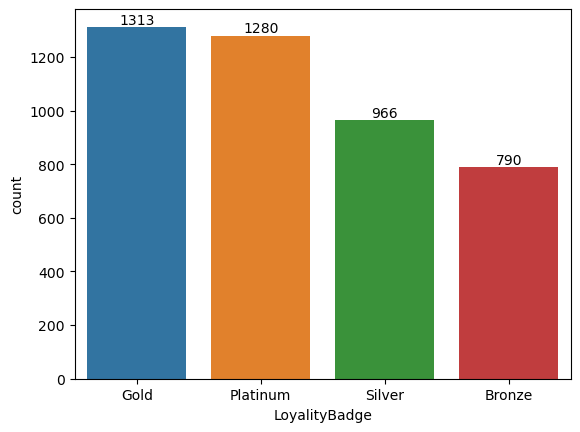

In [55]:
# Distribution of the customers
ax = sns.countplot(x=segemented_data['LoyalityBadge'],
              order=segemented_data['LoyalityBadge'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [59]:
# Exporting the segemented_data as csv for further usecase
segemented_data.to_csv('segemented_data.csv')